#Description about dataset
A water safety data set is a set of data that contains information about the water quality of different sampling points. This data set typically includes parameters such as pH, alkalinity, hardness, total dissolved solids, nitrate content, coliform content, etc.

Water safety data sets are used to assess water quality. If the data set shows that the water quality parameters are within the permissible limits, then the water is considered safe. On the other hand, if the water quality parameters exceed the permissible limits, then the water may not be safe and needs to be treated before use.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
df = pd.read_csv("waterQuality1.csv")

In [ ]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
# is_safe - class attribute {0 - not safe, 1 - safe}

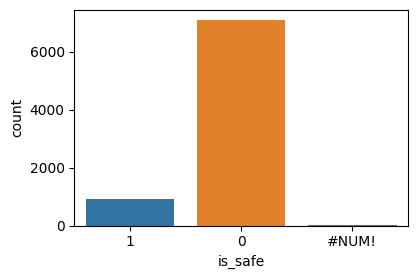

In [ ]:
plt.figure(figsize=(4.3, 2.8))
sns.countplot(data=df, x='is_safe');

In [ ]:
df = df[pd.to_numeric(df['is_safe'], errors='coerce').notnull()]

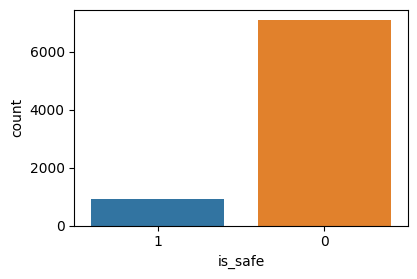

In [ ]:
plt.figure(figsize=(4.3, 2.8))
sns.countplot(data=df, x='is_safe');

In [ ]:
y = df['is_safe']
X = df.drop('is_safe', axis=1)

In [ ]:
X

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
scaler = StandardScaler()

In [ ]:
#scaler data

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
#USE SVM to Classifying

In [ ]:
model = SVC(class_weight='balanced', C = 10)
# Parameter C controls the level of regularization of the model. The lower the C value, the higher the level of regularization.

In [ ]:
parameters = {
    'C': [100, 150, 155, 160, 165, 170, 180, 190, 200],
    'gamma': ['scale', 'auto']
}
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# if ‘auto’, uses 1 / n_features

In [ ]:
grid_model = GridSearchCV(model, parameters)
# Hyperparameter tuning: Use GridSearchCV to choose the optimal value

Optimization is the process of finding the optimal value for a function. In the context of machine learning, optimization is the process of finding the machine learning model that performs the best on the training dataset.

There are many different optimization methods, each with its own advantages and disadvantages. Some common optimization methods include:

* Gradient descent: This is the most basic optimization method, based on updating the model parameters in the direction opposite to the gradient of the loss function.

* Stochastic gradient descent: This is a variation of gradient descent, which uses a small subset of the data to update the model parameters.

* Newton's method: This is a more efficient optimization method than gradient descent, but it requires more computation.

* Bayesian optimization: This is an optimization method based on Bayesian models, which uses the training data to estimate the distribution of the optimal parameter.

In [ ]:
  grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(C=10, class_weight='balanced'),
             param_grid={'C': [100, 150, 155, 160, 165, 170, 180, 190, 200],
                         'gamma': ['scale', 'auto']})

The method used is Gradient Descent. Gradient descent is a basic optimization method, used to find the parameters of the model so that the loss function is minimized.

In this case, the loss function is hinge loss, which is used to evaluate the performance of the SVC model. Gradient descent will update the parameters of SVC in the opposite direction of the gradient of the loss function. The gradient of the loss function is a vector that indicates the direction in which the loss function decreases most quickly. By updating the parameters in this direction, gradient descent will help the model learn to classify more accurately.

Some advantages of gradient descent:

* Ability to optimize the loss function: Gradient Descent helps to optimize the loss functions during model training. It searches for optimal parameters (weights) by following the opposite direction of the gradient of the loss function, thereby helping to minimize prediction errors.
* Good performance with large data sets: Gradient Descent can efficiently handle large datasets with millions or even billions of data samples. It breaks the data into mini-batches to calculate the gradient, helping to save time and computational resources.

In [ ]:
grid_model.best_params_

{'C': 160, 'gamma': 'scale'}

In [ ]:
y_pred = grid_model.predict(scaled_X_test)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       703
           1       0.79      0.75      0.77        97

    accuracy                           0.95       800
   macro avg       0.88      0.86      0.87       800
weighted avg       0.95      0.95      0.95       800



In [ ]:
score = grid_model.score(scaled_X_test, y_test)
print(score)

0.94625


In [ ]:
import tensorflow as tf

def svm_loss(y_true, y_pred):

    hinge_loss = tf.maximum(0.0, 1 - y_true * y_pred)
    C = 1.0
    weights = model.trainable_variables
    reg_term = 0.5 * C * sum([tf.reduce_sum(tf.square(w)) for w in weights])
    total_loss = tf.reduce_mean(hinge_loss) + reg_term
    return total_loss

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=None, use_bias=False)  # Linear SVM
])

model.compile(optimizer='adam', loss=svm_loss)
model.fit(scaled_X_train, y_train, epochs=100)
loss = model.evaluate(scaled_X_test, y_test)
print("Loss:", loss)
